In [2]:
# Standard Libraries
import os # operating system dependent functionality
from collections import Counter # counting elements in an iterable

# External Libraries
import numpy as np # numerical operations on data arrays and matrices
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # plotting and visualizations
from tqdm import tqdm
from sklearn.neighbors import NearestNeighbors

# Bioinformatics and Data Analysis 
import anndata # handling annotated data, particularly in genomics
import scanpy as sc # single-cell RNA-seq data analysis
import scipy # scientific and technical computations

# Test Specific Libraries
import scipy as sp
import scanpy.external as sce
import numpy as np
import matplotlib.pylab as pl
from mpl_toolkits.mplot3d import Axes3D  # noqa
import ot

# Huggingface
import torch
from transformers import AutoModelForCausalLM
from datasets import load_from_disk

# Confusion Matrix visualization
from sklearn.metrics import confusion_matrix
from pandas import DataFrame
import seaborn as sns

# Load human and mouse processed homolog intersected data

In [3]:
# Construct the path to the target directory and file
current_directory = os.getcwd()
parent_directory = os.path.abspath(os.path.join(current_directory, os.pardir))
target_directory = os.path.join(parent_directory, "Daphne CellOT Files")
os.makedirs(target_directory, exist_ok=True)  # Create the directory if it doesn't exist

# Define the full file path
file_path = os.path.join(target_directory, "harmony_common_pancreas.h5ad")

# Check if the file exists
if os.path.exists(file_path):
    # Load the AnnData object from the file
    combined_adata = anndata.read_h5ad(file_path)
    print(f"Loaded AnnData object from {file_path}")
else:
    # load processed AnnData object
    combined_adata = anndata.read_h5ad("/home/dor3/palmer_scratch/C2S_Files_Daphne/Cross_Species_Datasets/mouse_human_pancreas_tissue_Baron_et_al/processed_homolog_intersected_data/human_mouse_preprocessed_joint_adata.h5ad")

    # Identify highly variable genes with respect to batches
    batch_key = 'batch_sample'  # Adjust this key based on your specific batch information
    sc.pp.highly_variable_genes(combined_adata, batch_key=batch_key, flavor='seurat', n_top_genes=2000)

    # Add missing columns for highly variable genes
    if 'highly_variable_nbatches' not in combined_adata.var:
        combined_adata.var['highly_variable_nbatches'] = np.sum(combined_adata.var.highly_variable, axis=1)

    if 'highly_variable_intersection' not in combined_adata.var:
        combined_adata.var['highly_variable_intersection'] = combined_adata.var['highly_variable']

    # Run PCA on the combined AnnData
    sc.pp.pca(combined_adata)

    # Correct for batch effects using Harmony
    sc.external.pp.harmony_integrate(combined_adata, batch_key)

    # Compute the neighborhood graph
    sc.pp.neighbors(combined_adata, use_rep='X_pca_harmony')

    # Run UMAP
    sc.tl.umap(combined_adata)

    # Write the combined data to a file
    # Construct the path to the target directory and file
    current_directory = os.getcwd()
    parent_directory = os.path.abspath(os.path.join(current_directory, os.pardir))
    target_directory = os.path.join(parent_directory, "Daphne CellOT Files")
    os.makedirs(target_directory, exist_ok=True)  # Create the directory if it doesn't exist

    # Define the full file path
    file_path = os.path.join(target_directory, "harmony_common_pancreas.h5ad")

    # Assuming `adata` is your AnnData object
    combined_adata.write(file_path)

    # Print confirmation
    print(f"AnnData object saved to {file_path}")

# Print confirmation of the current adata object
print(combined_adata)
        



/home/dor3/.conda/envs/cell2sentence/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:247: RuntimeWarning: invalid value encountered in divide
  df["dispersions_norm"] = (
/home/dor3/.conda/envs/cell2sentence/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:247: RuntimeWarning: invalid value encountered in divide
  df["dispersions_norm"] = (
/home/dor3/.conda/envs/cell2sentence/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:247: RuntimeWarning: invalid value encountered in divide
  df["dispersions_norm"] = (


                highly_variable  highly_variable_nbatches  \
homolog_pair_0            False                         0   
homolog_pair_1            False                         1   
homolog_pair_2             True                         4   
homolog_pair_3             True                         5   
homolog_pair_4            False                         0   

                highly_variable_intersection  
homolog_pair_0                         False  
homolog_pair_1                         False  
homolog_pair_2                         False  
homolog_pair_3                         False  
homolog_pair_4                         False  


2024-11-19 20:42:13,584 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-11-19 20:42:16,892 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-11-19 20:42:16,924 - harmonypy - INFO - Iteration 1 of 10
2024-11-19 20:42:18,890 - harmonypy - INFO - Iteration 2 of 10
2024-11-19 20:42:21,037 - harmonypy - INFO - Iteration 3 of 10
2024-11-19 20:42:22,908 - harmonypy - INFO - Iteration 4 of 10
2024-11-19 20:42:24,884 - harmonypy - INFO - Iteration 5 of 10
2024-11-19 20:42:26,574 - harmonypy - INFO - Iteration 6 of 10
2024-11-19 20:42:27,990 - harmonypy - INFO - Iteration 7 of 10
2024-11-19 20:42:29,030 - harmonypy - INFO - Iteration 8 of 10
2024-11-19 20:42:30,120 - harmonypy - INFO - Iteration 9 of 10
2024-11-19 20:42:31,203 - harmonypy - INFO - Converged after 9 iterations


AnnData object saved to /vast/palmer/home.mccleary/dor3/cell2sentence/cross_species/Daphne CellOT Files/harmony_common_pancreas.h5ad
AnnData object with n_obs × n_vars = 10455 × 12113
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'
    var: 'homolog_pair_idx', 'human_gene_name', 'mouse_gene_name', 'human_gene_ensembl_id', 'mouse_gene_ensembl_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'cell_types_colors', 'neighbors', 'pca', 'species_label_colors', 'umap', 'hvg'
    obsm: 'X_pca', 'X_umap', 'X_pca_harmony'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


/home/dor3/.conda/envs/cell2sentence/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


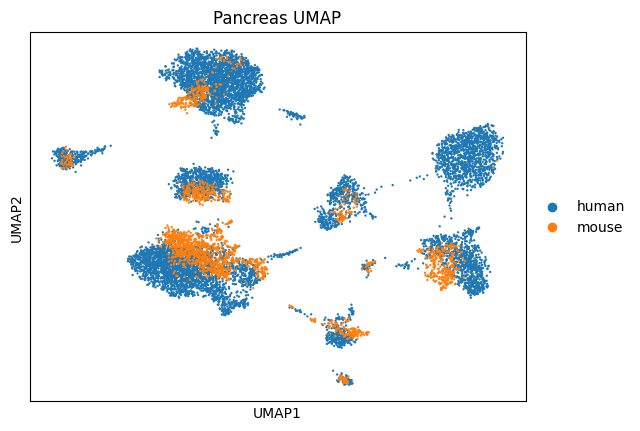

In [4]:
sc.pl.umap(
    combined_adata,
    color="species_label",
    use_raw=False,
    layer="X_umap",
    title="Pancreas UMAP"
)

/home/dor3/.conda/envs/cell2sentence/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


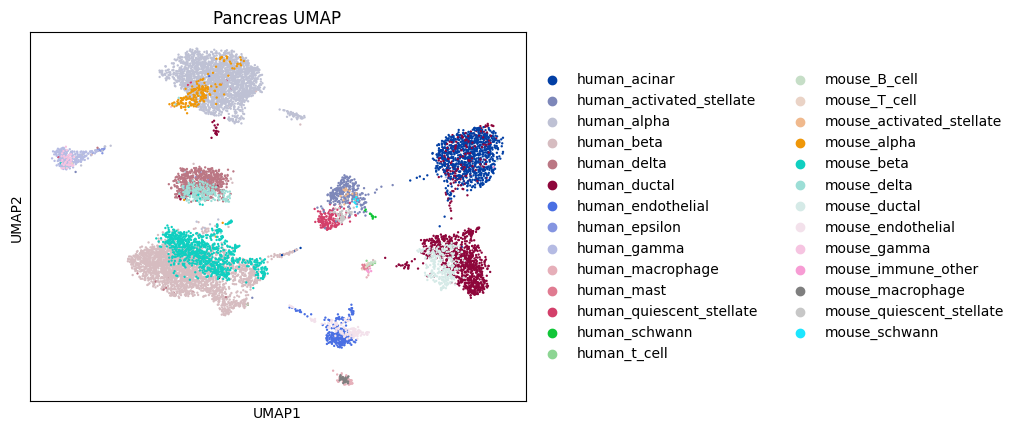

In [5]:
sc.pl.umap(
    combined_adata,
    color="species_cell_type_label",
    use_raw=False,
    layer="X_umap",
    title="Pancreas UMAP"
)

/home/dor3/.conda/envs/cell2sentence/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


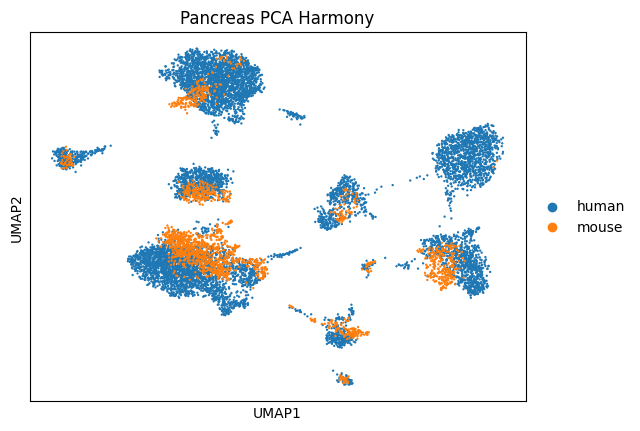

In [6]:
sc.pl.umap(
    combined_adata,
    color="species_label",
    use_raw=False,
    layer="X_pca_harmony",
    title="Pancreas PCA Harmony"
)

/home/dor3/.conda/envs/cell2sentence/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


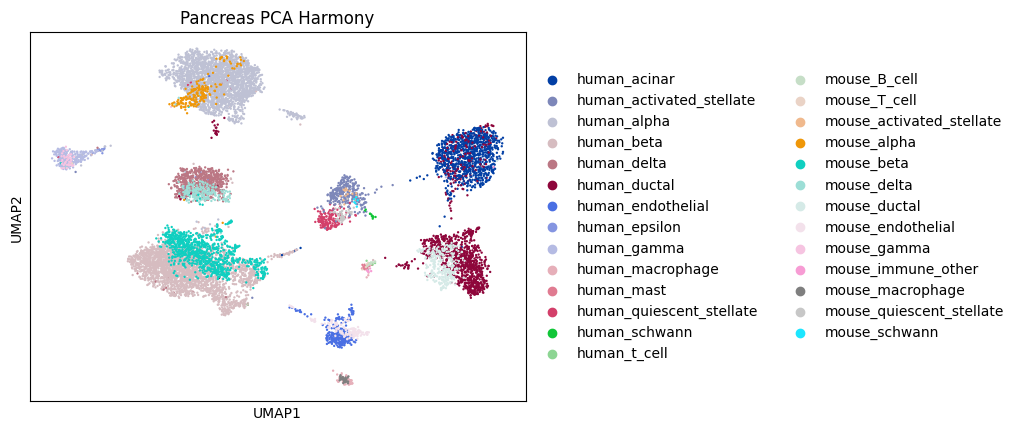

In [7]:
sc.pl.umap(
    combined_adata,
    color="species_cell_type_label",
    use_raw=False,
    layer="X_pca_harmony",
    title="Pancreas PCA Harmony"
)

In [8]:
combined_adata.obsm["X_pca_harmony"][:5, :5]

array([[ 7.872984  , -2.34846   ,  0.2610291 ,  0.17428954,  0.2520048 ],
       [ 8.198186  , -1.2548335 ,  0.3399528 , -1.0903926 , -0.18608363],
       [ 7.928614  , -2.7199607 ,  0.14189535,  0.30561626,  0.37949485],
       [ 8.158575  , -1.44687   ,  0.4452163 , -0.9310918 , -0.0537358 ],
       [ 7.607334  , -1.2210503 ,  0.34590477, -0.6432715 ,  0.02374936]],
      dtype=float32)

In [9]:
combined_adata.obsm["X_umap"][:5, :5]

array([[14.043752,  9.819547],
       [11.951826,  8.833523],
       [12.59623 , 10.60973 ],
       [11.890131,  9.505344],
       [12.798475,  8.67601 ]], dtype=float32)

In [10]:
print(combined_adata.obsm["X_pca_harmony"].shape)
print(combined_adata.obsm["X_umap"].shape)

(10455, 50)
(10455, 2)


In [11]:
Counter(combined_adata.obs["species_label"])

Counter({'human': 8569, 'mouse': 1886})

In [12]:
combined_adata.X

<10455x12113 sparse matrix of type '<class 'numpy.float32'>'
	with 17178554 stored elements in Compressed Sparse Row format>

In [13]:
combined_adata.obs.head()

,cell_barcodes,cell_manual_ids,cell_types,batch_sample,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,species_cell_type_label,species_label
human1_lib1.final_cell_0001,GATGACGGAC-GGTGGGAT,human1_lib1.final_cell_0001,acinar,GSM2230757_human1_umifm_counts,3526,3526,22412.0,0.0,0.0,human_acinar,human
human1_lib1.final_cell_0002,GAGCGTTGCT-ACCTTCTT,human1_lib1.final_cell_0002,acinar,GSM2230757_human1_umifm_counts,4201,4201,27953.0,0.0,0.0,human_acinar,human
human1_lib1.final_cell_0003,CTTACGGG-CCATTACT,human1_lib1.final_cell_0003,acinar,GSM2230757_human1_umifm_counts,2119,2118,16894.0,0.0,0.0,human_acinar,human
human1_lib1.final_cell_0004,GATGTACACG-TTAAACTG,human1_lib1.final_cell_0004,acinar,GSM2230757_human1_umifm_counts,2956,2956,19300.0,0.0,0.0,human_acinar,human
human1_lib1.final_cell_0005,GAGATTGCGA-GTCGTCGT,human1_lib1.final_cell_0005,acinar,GSM2230757_human1_umifm_counts,2715,2715,15067.0,0.0,0.0,human_acinar,human


In [14]:
combined_adata.var.head()

,homolog_pair_idx,human_gene_name,mouse_gene_name,human_gene_ensembl_id,mouse_gene_ensembl_id,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection
homolog_pair_0,homolog_pair_0,EIF1AY,EIF1A,ENSG00000198692,ENSMUSG00000057561,False,0.069323,-0.997422,-0.755563,0,False
homolog_pair_1,homolog_pair_1,COLEC12,COLEC12,ENSG00000158270,ENSMUSG00000036103,False,0.000704,-0.693991,-0.118897,1,False
homolog_pair_2,homolog_pair_2,IMPA2,IMPA2,ENSG00000141401,ENSMUSG00000024525,True,0.092954,-0.603601,0.574109,4,False
homolog_pair_3,homolog_pair_3,RAB31,RAB31,ENSG00000168461,ENSMUSG00000056515,True,0.079748,-0.498244,0.992624,5,False
homolog_pair_4,homolog_pair_4,MED15,MED15,ENSG00000099917,ENSMUSG00000012114,False,0.066131,-0.918829,-0.502386,0,False
